<a href="https://colab.research.google.com/github/javadh220/Ice-task-2-PDAN/blob/main/Ice_task_2_PDAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('Iris.csv')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop ID column as it's not useful for clustering
df = df.drop('Id', axis=1)

# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


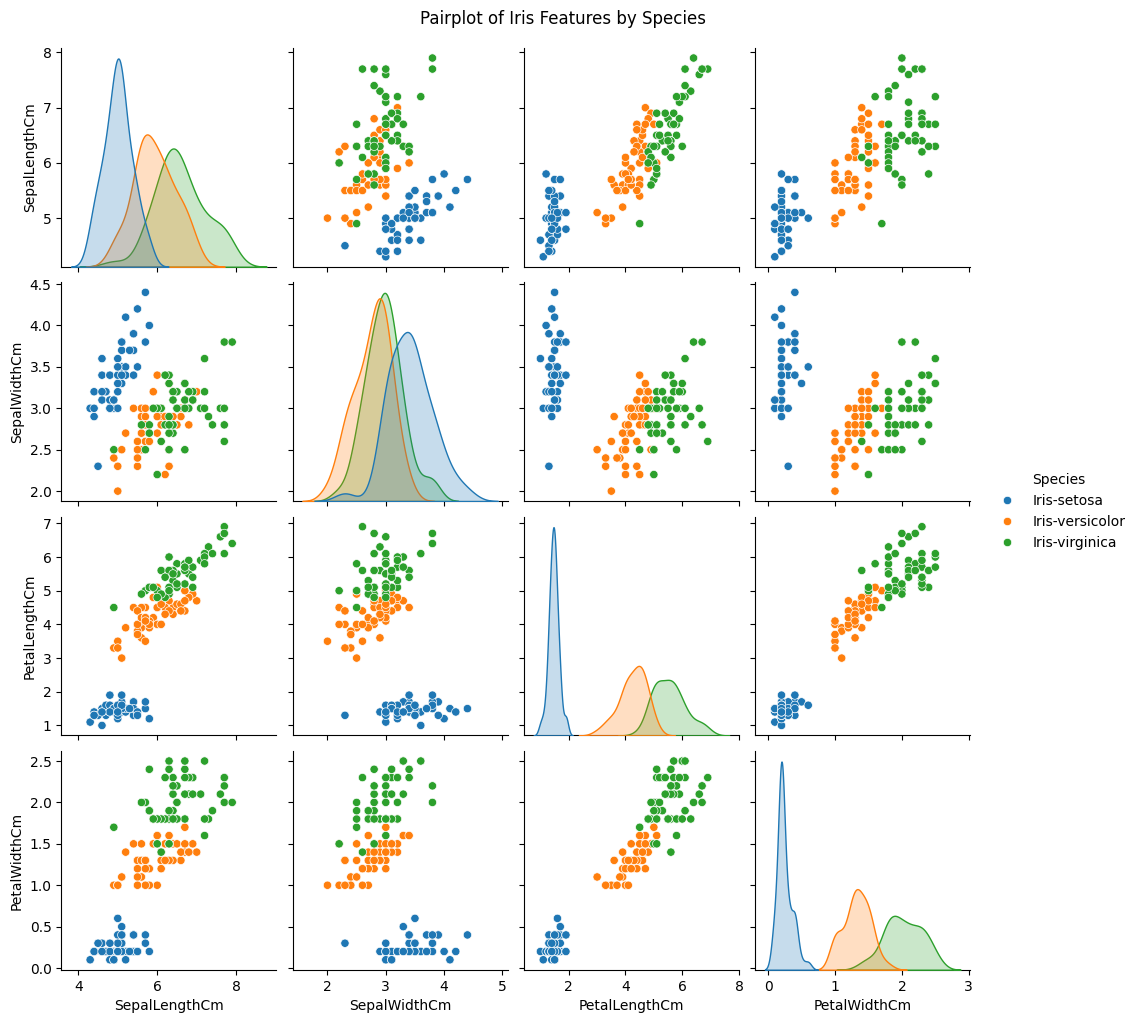

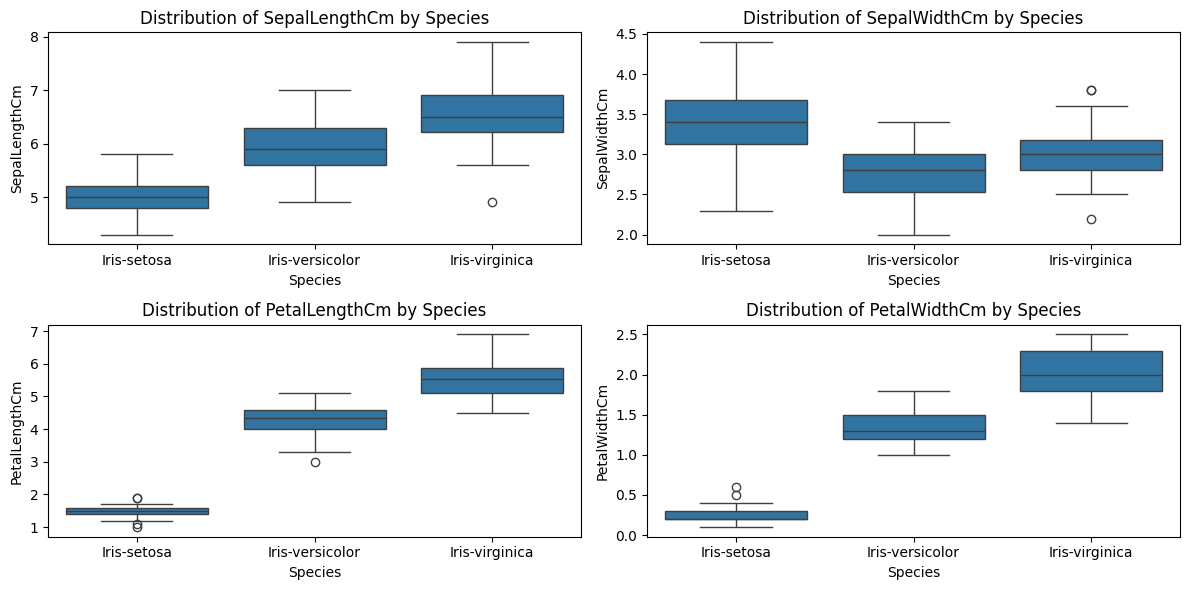

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see relationships between features
sns.pairplot(df, hue='Species')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

# Boxplots for each feature by species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()


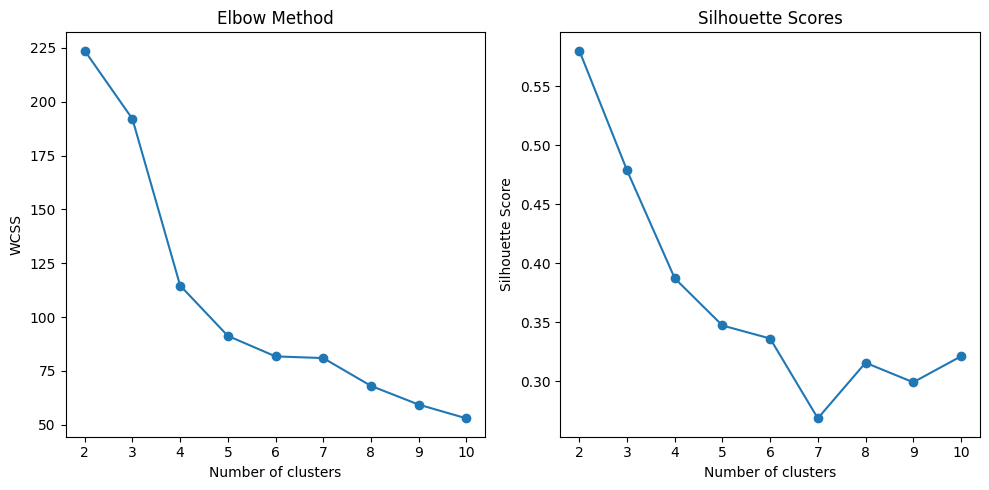

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using Elbow Method
wcss = []
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Apply K-Means with optimal clusters (3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

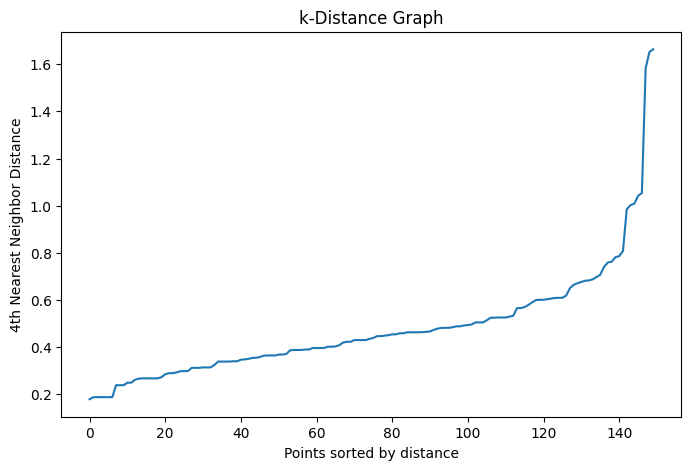

DBSCAN (eps=0.8) clusters: 2
DBSCAN (eps=1.0) clusters: 2
DBSCAN (eps=1.2) clusters: 2


In [15]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np  # Import numpy

# Find optimal eps using k-distance graph
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

# Apply DBSCAN with different parameters
dbscan1 = DBSCAN(eps=0.8, min_samples=4).fit(X_scaled)
dbscan2 = DBSCAN(eps=1.0, min_samples=4).fit(X_scaled)
dbscan3 = DBSCAN(eps=1.2, min_samples=4).fit(X_scaled)

print("DBSCAN (eps=0.8) clusters:", len(set(dbscan1.labels_)) - (1 if -1 in dbscan1.labels_ else 0))
print("DBSCAN (eps=1.0) clusters:", len(set(dbscan2.labels_)) - (1 if -1 in dbscan2.labels_ else 0))
print("DBSCAN (eps=1.2) clusters:", len(set(dbscan3.labels_)) - (1 if -1 in dbscan3.labels_ else 0))

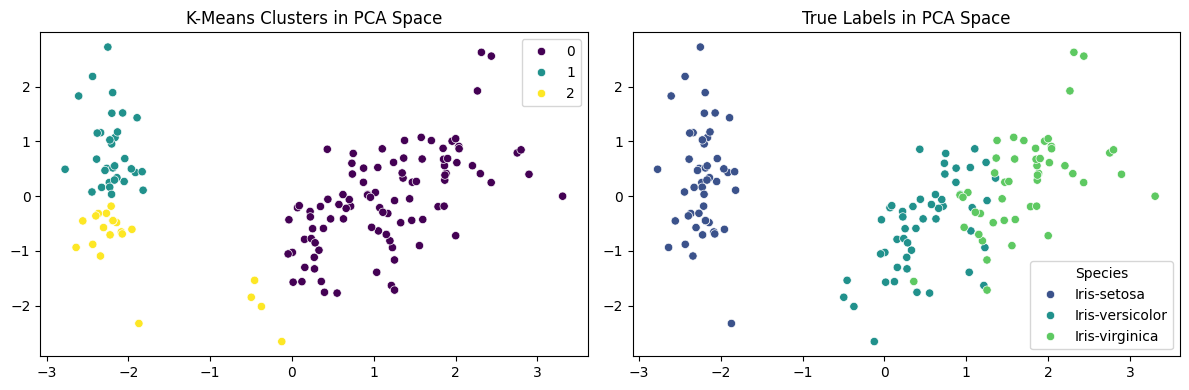

In [16]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters in PCA space
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clusters in PCA Space')

# Plot true labels in PCA space
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('True Labels in PCA Space')
plt.tight_layout()
plt.show()

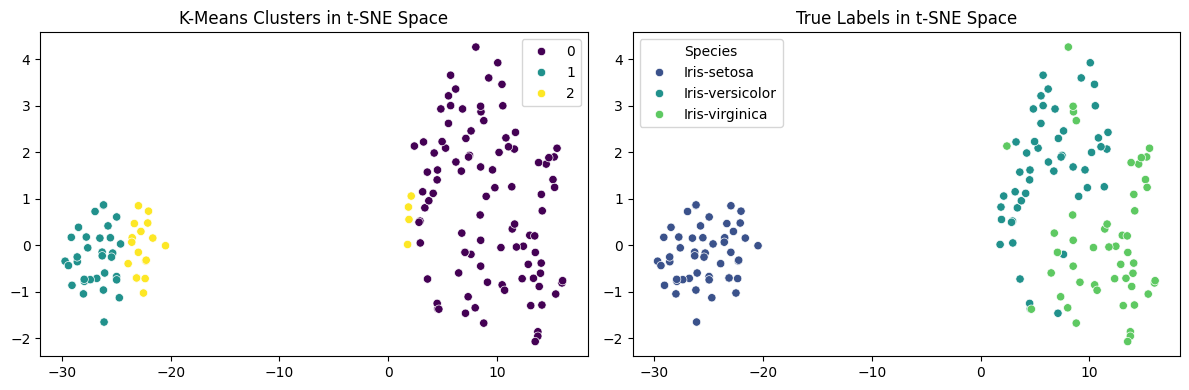

In [17]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot clusters in t-SNE space
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clusters in t-SNE Space')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis')
plt.title('True Labels in t-SNE Space')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


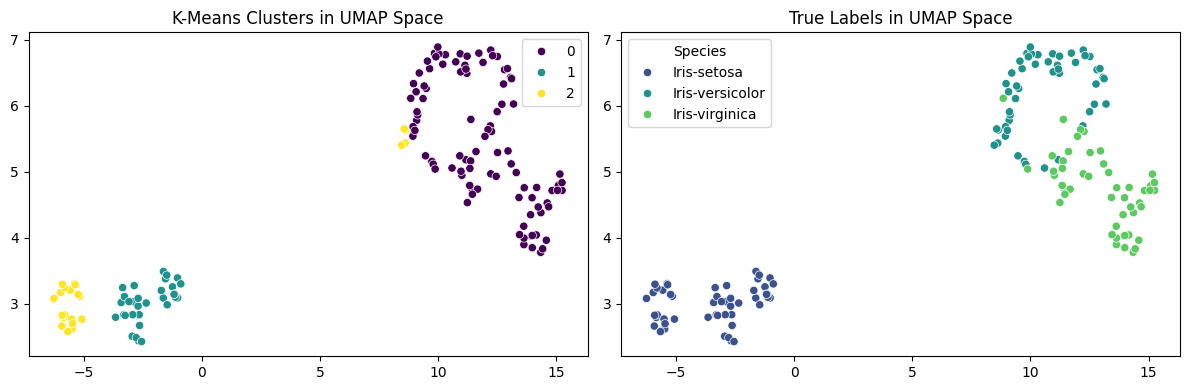

In [18]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Plot clusters in UMAP space
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clusters in UMAP Space')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis')
plt.title('True Labels in UMAP Space')
plt.tight_layout()
plt.show()

Comparison of Results

K-Means performed well, finding 3 distinct clusters that largely match the true species labels.

DBSCAN was more sensitive to parameter settings. With eps=1.0, it also found 3 clusters but identified a few points as noise.

Dimensionality Reduction:
PCA showed good separation between clusters while preserving the most variance

t-SNE provided excellent cluster separation but is computationally more expensive

UMAP offered results similar to t-SNE but often with better preservation of global structure

The analysis demonstrates that the Iris dataset has clear cluster structure that can be effectively revealed through these unsupervised learning techniques.